## ANN Customer Churn Prediction

In [40]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import sklearn
%matplotlib inline

### Data Preprocesssing

In [2]:
df = pd.read_csv(r"C:\Users\utkarsh.alpuria\Desktop\My Work\Python\Python ML\Python ML Algorithm\Deep_Learning\NN_Datasets\WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Data Cleaning

In [3]:
# customerID is not required
df.drop(["customerID"], axis="columns", inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
df.TotalCharges.values # these are string values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [26]:
# convert string values to numbers
pd.to_numeric(df.TotalCharges, errors="coerce") # errors="coerce" ignore the value which can't be converted to numbers

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [27]:
# we drop the rows with TotalCharges value is empty string (" ")
df1 = df[df.TotalCharges!=" "] # keep only the rows which have TotalCharges value
df1.shape

(7032, 20)

In [28]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges) # converting TotalCharges column value to numbers

C:\Users\utkarsh.alpuria\AppData\Local\Temp\ipykernel_34372\469475419.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges) # converting TotalCharges column value to numbers


#### Data Visualization

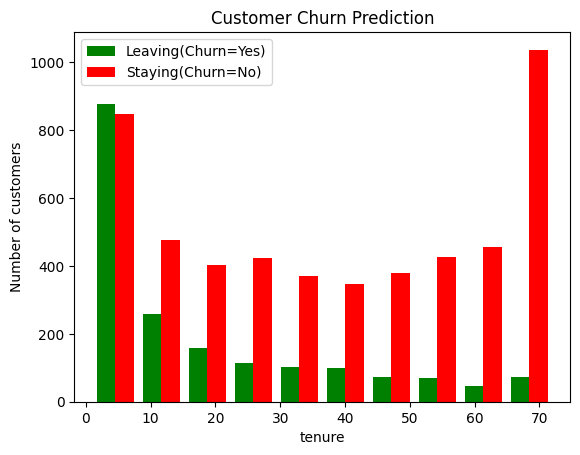

In [29]:
# tenure -> no. of months customer is in service of company
tenure_churn_no = df1[df1.Churn=="No"].tenure # tenure(in months) of customer which are staying
tenure_churn_yes = df1[df1.Churn=="Yes"].tenure # tenure(in months) of customer which are leaving

plt.title("Customer Churn Prediction")
plt.hist([tenure_churn_yes, tenure_churn_no], color=["green", "red"])
plt.xlabel("tenure")
plt.ylabel("Number of customers")
plt.legend(["Leaving(Churn=Yes)", "Staying(Churn=No)"])

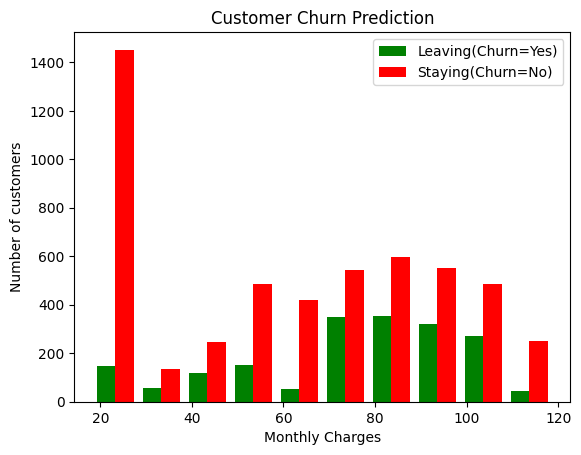

In [30]:
mc_churn_no = df1[df1.Churn=="No"].MonthlyCharges # MonthlyCharges(in months) of customer which are staying
mc_churn_yes = df1[df1.Churn=="Yes"].MonthlyCharges # MonthlyCharges(in months) of customer which are leaving

plt.title("Customer Churn Prediction")
plt.hist([mc_churn_yes, mc_churn_no], color=["green", "red"])
plt.xlabel("Monthly Charges")
plt.ylabel("Number of customers")
plt.legend(["Leaving(Churn=Yes)", "Staying(Churn=No)"])

#### One Hot Encoding Data

In [31]:
# many columns have categorical values(like "Yes" and "No") values -> we will do hot encoding
def print_unique_col_value(df):
    for column in df:
        if df[column].dtypes == "object": # objects with categorical values
            print(f"{column} : {df[column].unique()}")

print_unique_col_value(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [32]:
# replace "No internet service" and "No phone service" with "No"
df1.replace("No internet service", "No", inplace=True)
df1.replace("No phone service", "No", inplace=True)


C:\Users\utkarsh.alpuria\AppData\Local\Temp\ipykernel_34372\2263419747.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace("No internet service", "No", inplace=True)
C:\Users\utkarsh.alpuria\AppData\Local\Temp\ipykernel_34372\2263419747.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace("No phone service", "No", inplace=True)


In [33]:
print_unique_col_value(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [34]:
# converting yes no to 1 0 (ONE HOT ENCODING)

yes_no_columns = ["Partner", "Dependents", "PhoneService", "MultipleLines", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "PaperlessBilling", "Churn"]

for col in yes_no_columns:
    df1[col].replace({"Yes" : 1, "No" : 0}, inplace=True)


gender : ['Female' 'Male']
InternetService : ['DSL' 'Fiber optic' 'No']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


C:\Users\utkarsh.alpuria\AppData\Local\Temp\ipykernel_34372\1426463629.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].replace({"Yes" : 1, "No" : 0}, inplace=True)
C:\Users\utkarsh.alpuria\AppData\Local\Temp\ipykernel_34372\1426463629.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  

In [36]:
df1.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1


In [38]:
df1["gender"].replace({"Female" : 1, "Male" : 0}, inplace=True)
df1["gender"].unique()

C:\Users\utkarsh.alpuria\AppData\Local\Temp\ipykernel_34372\37337691.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["gender"].replace({"Female" : 1, "Male" : 0}, inplace=True)


array([1, 0], dtype=int64)

In [39]:
# for columns with more than 2 categories 
df2 = pd.get_dummies(data=df1, columns=["InternetService", "Contract", "PaymentMethod"])

df2.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,True,False,False,True,False,False,False,False,True,False
1,0,0,0,0,34,1,0,1,0,1,...,True,False,False,False,True,False,False,False,False,True
2,0,0,0,0,2,1,0,1,1,0,...,True,False,False,True,False,False,False,False,False,True


#### Data Scaling

In [41]:
# we have to do data scaling for "tenure", "MonthlyCharges", "TotalCharges" to value between 0 to 1 

from sklearn.preprocessing import MinMaxScaler

cols_to_scale = ["tenure", "MonthlyCharges", "TotalCharges"]

scaler = MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [42]:
df2.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,True,False,False,True,False,False,False,False,True,False
1,0,0,0,0,0.464789,1,0,1,0,1,...,True,False,False,False,True,False,False,False,False,True
2,0,0,0,0,0.014085,1,0,1,1,0,...,True,False,False,True,False,False,False,False,False,True


#### Data Train Test Split

In [43]:
X = df2.drop(["Churn"], axis="columns")
y = df2["Churn"]

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [45]:
X_train.shape, X_test.shape

((5625, 26), (1407, 26))

### Tensorflow ANN

#### Creat ANN Model

In [47]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(26,), activation="relu"), # input layer 26 input neurons conected to 20 neurons in hidden layer.
    keras.layers.Dense(1, activation="sigmoid"), # 20 hidden layer neurons connected to 1 neuron in output layer.
])

model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["Accuracy"])
model.summary()

c:\Users\utkarsh.alpuria\Desktop\My Work\Python\Python ML\Python ML Algorithm\.ml_algo_py_venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 20)             │           540 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 561 (2.19 KB)

 Trainable params: 561 (2.19 KB)

 Non-trainable params: 0 (0.00 B)

#### Training Model

In [49]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Accuracy: 0.8082 - loss: 0.4140
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Accuracy: 0.8103 - loss: 0.4110
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Accuracy: 0.8113 - loss: 0.4103
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Accuracy: 0.8022 - loss: 0.4146
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Accuracy: 0.8125 - loss: 0.3978
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Accuracy: 0.8022 - loss: 0.4155
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Accuracy: 0.8085 - loss: 0.4102
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Accuracy: 0.8134 - loss: 0.4070
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Accuracy: 0.8149 - loss: 0.4038
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Accuracy: 0.8126 - loss: 0.4073
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Accuracy: 0.8106 - loss: 0.3983
Epoch 12/100
176/176 ━━━━━━━━━━━━━━━━━━━━

In [51]:
model.evaluate(X_test, y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Accuracy: 0.8008 - loss: 0.4421


[0.4561236500740051, 0.7889125943183899]

#### Predictions

In [56]:
yp = model.predict(X_test)

yp[:10]

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


array([[0.15985407],
       [0.3936795 ],
       [0.0103773 ],
       [0.7847311 ],
       [0.3827328 ],
       [0.70877576],
       [0.08052845],
       [0.54489523],
       [0.28908998],
       [0.06156199]], dtype=float32)

In [57]:
y_pred = []
for element in yp:
    if element>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
y_pred[:10]

[0, 0, 0, 1, 0, 1, 0, 1, 0, 0]

In [58]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

#### Classification Report

In [59]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86       999
           1       0.67      0.53      0.59       408

    accuracy                           0.79      1407
   macro avg       0.75      0.71      0.73      1407
weighted avg       0.78      0.79      0.78      1407



Text(33.22222222222222, 0.5, 'Truth')

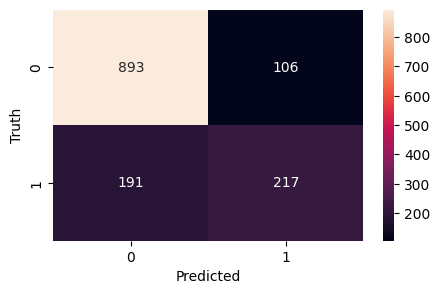

In [61]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

plt.figure(figsize=(5,3))
sn.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [62]:
# accuracy = correct predictionc/total predictions
(893+217)/(893+217+191+106) # accuracy

0.7889125799573561

In [63]:
# Precision for 0 class i.e. Precision for customer who did not churn
893/(893+191)

0.8238007380073801

In [64]:
# Precision for 1 class i.e. Precision for customer who actually churned
217/(217+106)

0.6718266253869969

In [65]:
# recall for 0
893/(893+106)

0.8938938938938938

In [66]:
# recall for 1
217/(217+191)

0.5318627450980392